In [1]:
import cv2
import sys
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

In [2]:
imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_619_1.jpg"

In [3]:
def findFace(imgPath):
    image = cv2.imread(imgPath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.3,
            minNeighbors=3)
    faceArrayLst = []
    for i in faces:
        faceArrayLst.append(((i[0], i[1]), (i[0]+i[2], i[1]), (i[0]+i[2], i[1]+i[3]), (i[0], i[1]+i[3])))
    return faceArrayLst

In [4]:
faceArray = findFace(imagePath)

In [14]:
faceArrayDetailed = []
for i in faceArray:
    faceArrayDetailed.append([i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1], i[3][0], i[3][1], i])

In [35]:
rowNums = []
for i in range(len(faceArrayDetailed)):
    rowNums.append("Face " + str(i+1))
colNums = ["Top Left X", "Top Left Y", "Top Right X", "Top Right Y", 
           "Bottom Left X", "Bottom Left Y", "Bottom Right X", "Bottom Right Y", "Matrix"]

In [37]:
dfFaces

,Top Left X,Top Left Y,Top Right X,Top Right Y,Bottom Left X,Bottom Left Y,Bottom Right X,Bottom Right Y,Matrix
Face 1,114,157,399,157,399,442,114,442,"((114, 157), (399, 157), (399, 442), (114, 442))"


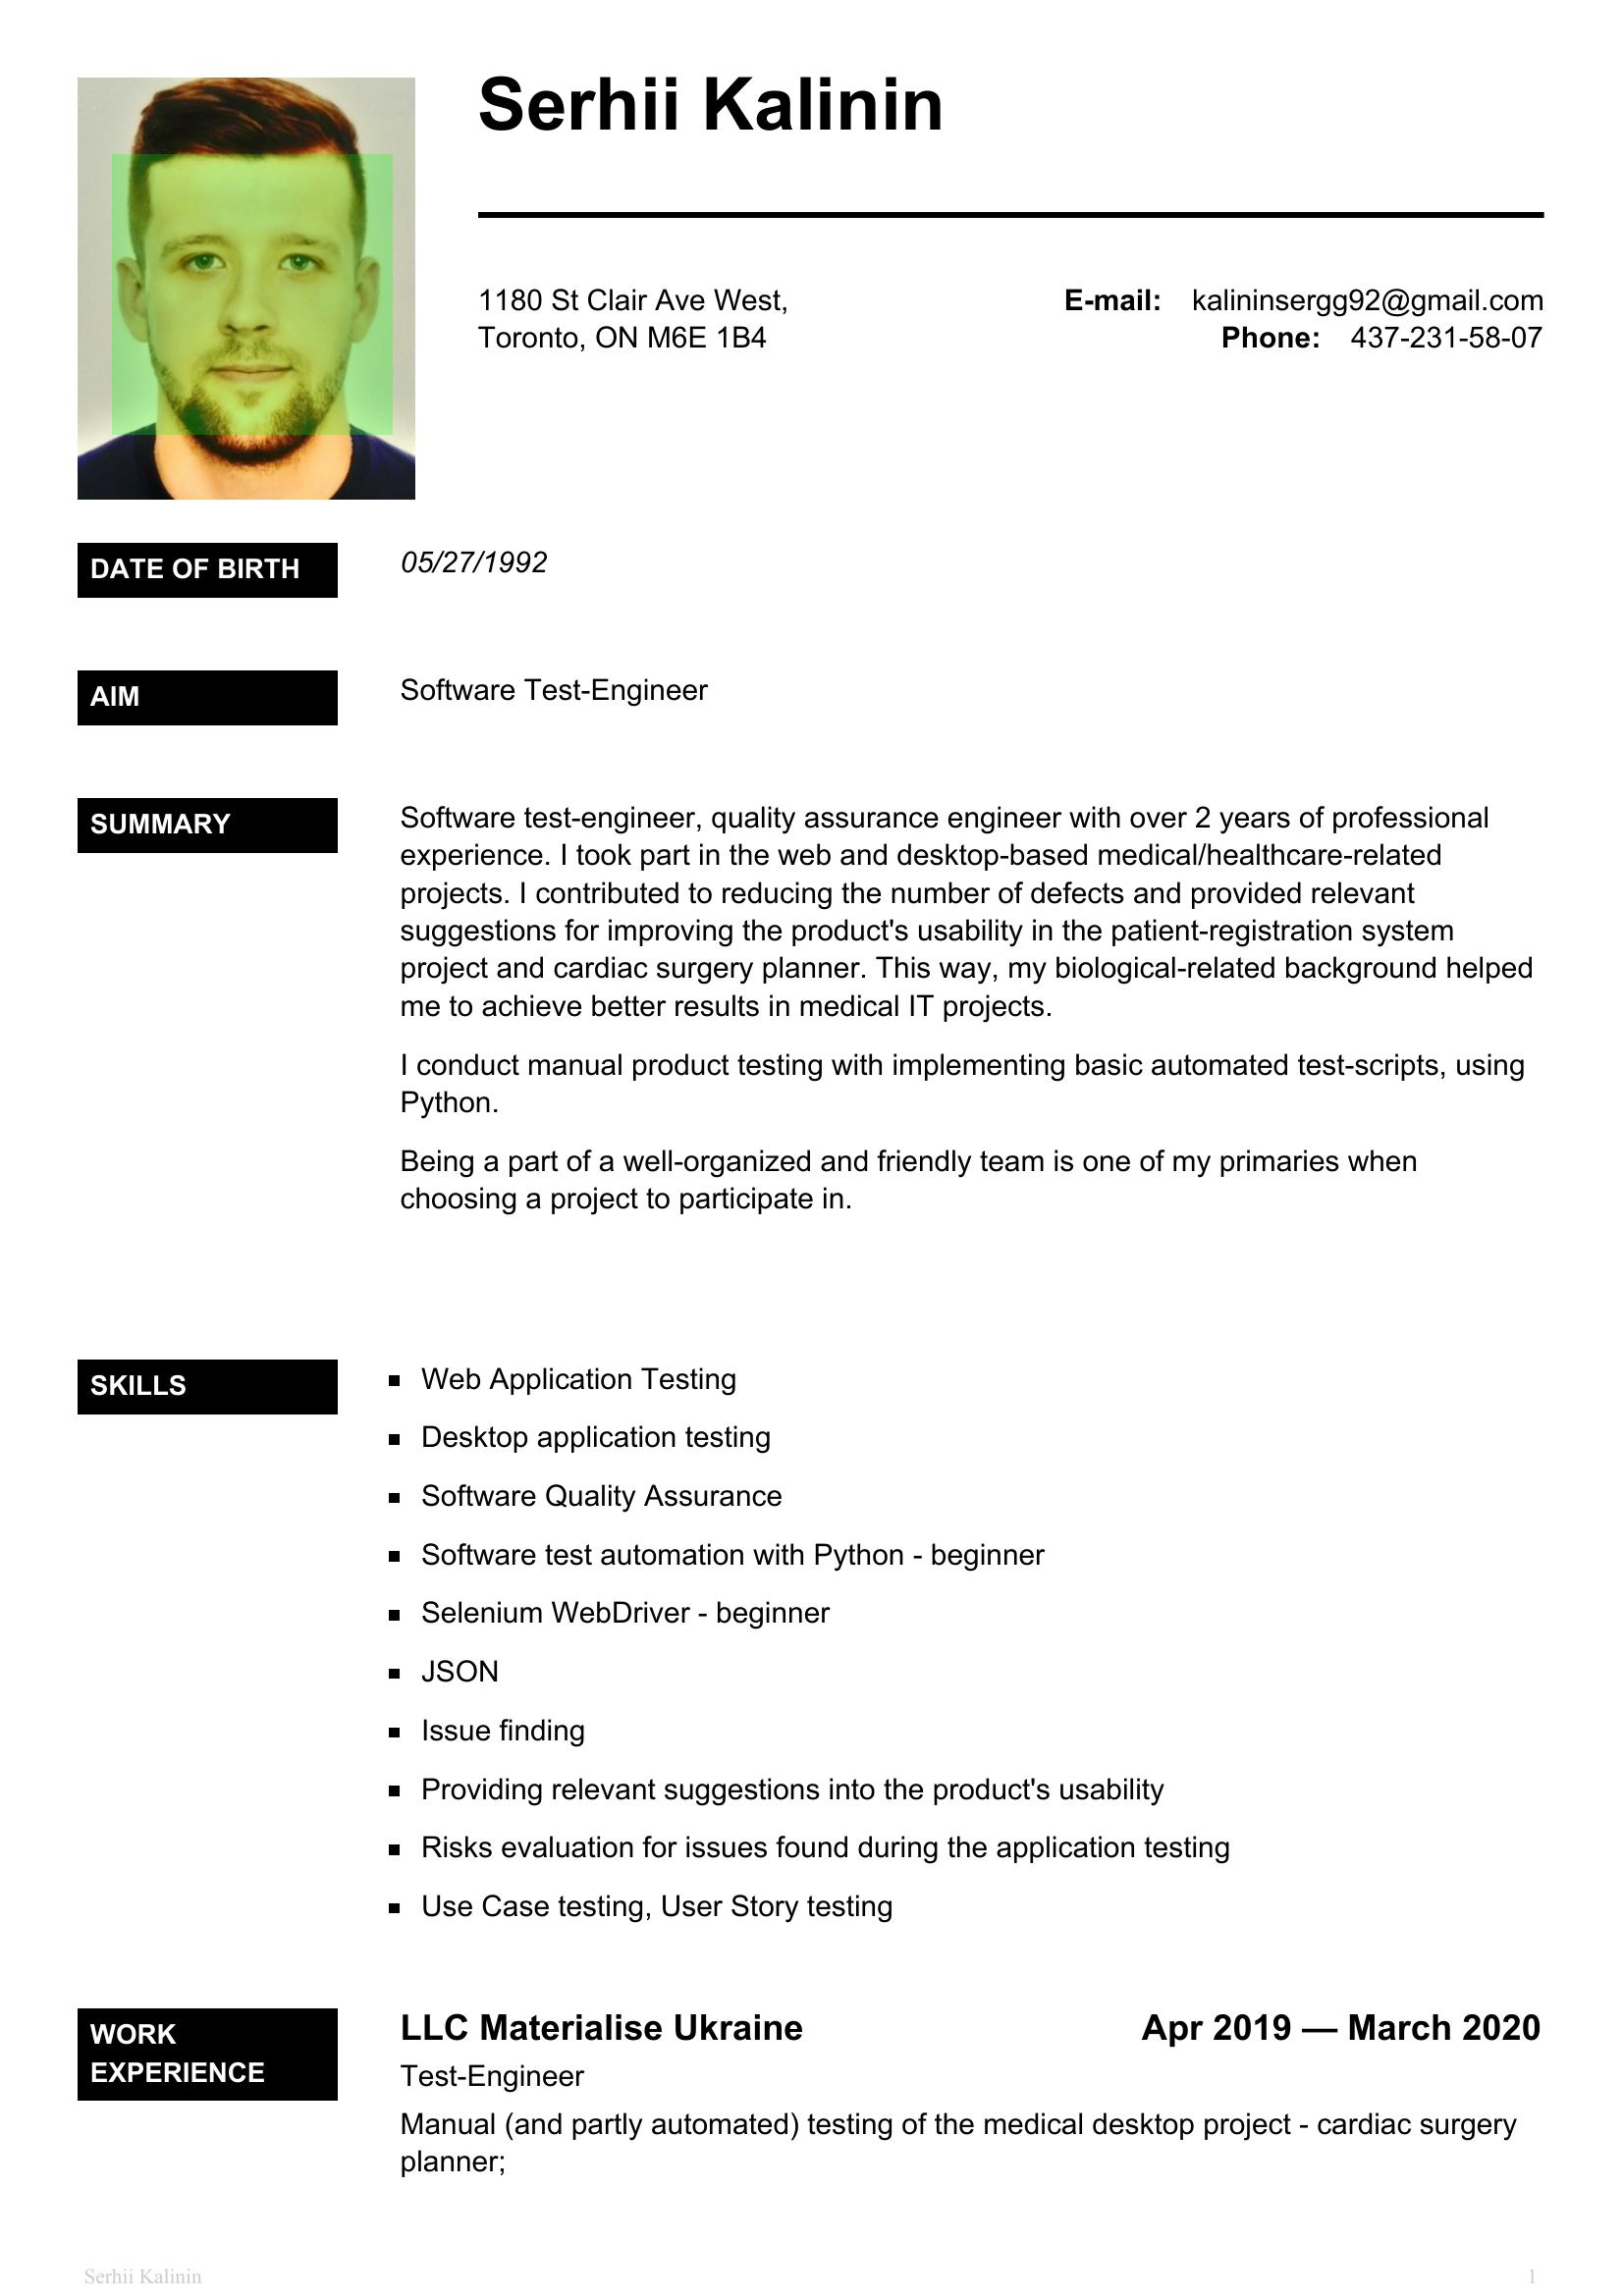

In [5]:
TINT_COLOR = (0,255,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
for i in faceArray:
    draw.polygon(i, fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img